# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup **2p**:
    - Implement multiple models, to solve a regression problem using traditional ML: 
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation **10p**
    - Establish a Baseline Model *2p*
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection: - Optional
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation: *8p*
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
        - You may need multiple preprocessed datasets preprocessed
- Hyperparameter Tuning - Optional
  - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments. 
  - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
  - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
  - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics: *1p*
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2919,40,Private,146659,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
11515,69,Private,370837,Bachelors,13,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3073,27,Private,229803,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
6226,25,Self-emp-not-inc,266668,HS-grad,9,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
917,67,Self-emp-inc,76860,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K
3934,53,Private,103950,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
26109,41,Private,139907,Assoc-voc,11,Separated,Craft-repair,Not-in-family,White,Male,0,0,30,United-States,<=50K
16543,62,Self-emp-not-inc,162347,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,15,United-States,>50K
3629,32,Private,130304,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1485,48,United-States,<=50K
22284,54,Self-emp-inc,147239,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [3]:
# Load Data
train_df = pd.read_csv('census_preprocessed_train.csv')
test_df = pd.read_csv('census_preprocessed_test.csv')

# Separate Features (X) and Target (y)
X_train_full = train_df.drop('hours-per-week', axis=1)
y_train_full = train_df['hours-per-week']

X_test = test_df.drop('hours-per-week', axis=1)
y_test = test_df['hours-per-week']

In [5]:
# Creating a Validation Set from the Training Set (20% of Train)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

print(f"Train Shape: {X_train.shape}")
print(f"Val Shape:   {X_val.shape}")
print(f"Test Shape:  {X_test.shape}")

# Helper function to calculate and print metrics
def evaluate_model(name, model, X, y):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, preds)
    r2 = r2_score(y, preds)
    return {'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# List to store results of all experiments
results_list = []

Train Shape: (20823, 85)
Val Shape:   (5206, 85)
Test Shape:  (6508, 85)


In [7]:
print(" 2. Establishing Baselines (Default Settings)")
# Model A: SGDRegressor (Gradient Descent) 
sgd_baseline = SGDRegressor(random_state=42, max_iter=1000, tol=1e-3)
sgd_baseline.fit(X_train, y_train)
results_list.append(evaluate_model('SGD Baseline (Default)', sgd_baseline, X_val, y_val))

# Model B: Decision Tree Regressor 
# Captures non-linear relationships.
dt_baseline = DecisionTreeRegressor(random_state=42)
dt_baseline.fit(X_train, y_train)
results_list.append(evaluate_model('Decision Tree Baseline', dt_baseline, X_val, y_val))

# Model C: Linear Regression (OLS). Comparison Only 
lr_baseline = LinearRegression()
lr_baseline.fit(X_train, y_train)
results_list.append(evaluate_model('Linear Regression (OLS Comparison)', lr_baseline, X_val, y_val))

 2. Establishing Baselines (Default Settings)


In [9]:
# 3. Running Experiments (Hyperparameters & Regularization)

# --- Experiment 1: SGD with Huber Loss (Robust to Outliers) ---
# EDA showed significant outliers. Huber loss is less sensitive to them than Squared Error.
sgd_huber = SGDRegressor(loss='huber', random_state=42, max_iter=2000, alpha=0.001)
sgd_huber.fit(X_train, y_train)
results_list.append(evaluate_model('Exp 1: SGD + Huber Loss', sgd_huber, X_val, y_val))

# --- Experiment 2: SGD with ElasticNet Penalty ---
# Combines L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting
sgd_elastic = SGDRegressor(penalty='elasticnet', l1_ratio=0.15, random_state=42)
sgd_elastic.fit(X_train, y_train)
results_list.append(evaluate_model('Exp 2: SGD + ElasticNet', sgd_elastic, X_val, y_val))

# --- Experiment 3: Decision Tree with Pruning (Max Depth) ---
# Default trees overfit (high variance). Limiting depth generalizes better.
dt_pruned = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42)
dt_pruned.fit(X_train, y_train)
results_list.append(evaluate_model('Exp 3: Decision Tree (Pruned depth=10)', dt_pruned, X_val, y_val))

# --- Experiment 4: Random Forest (Optional / Ensemble) ---
# Random Forest averages many trees to reduce error.
rf_model = RandomForestRegressor(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
results_list.append(evaluate_model('Exp 4: Random Forest (Ensemble)', rf_model, X_val, y_val))

In [10]:
# 4. Final Evaluation on TEST Set 

# Based on experiments, we select the best performing model.
# (Usually Random Forest or Pruned Tree performs best on this data).
best_model = rf_model 
best_model_name = "Random Forest (Best Model)"

test_metrics = evaluate_model(best_model_name + " [TEST]", best_model, X_test, y_test)
results_list.append(test_metrics)

# Display Results Table
results_df = pd.DataFrame(results_list)
# Reorder columns for readability
results_df = results_df[['Model', 'RMSE', 'MAE', 'R2', 'MSE']]
print("\n=== FINAL EXPERIMENT RESULTS TABLE ===")
display(results_df.sort_values(by='RMSE'))



=== FINAL EXPERIMENT RESULTS TABLE ===


,Model,RMSE,MAE,R2,MSE
9,Exp 4: Random Forest (Ensemble),10.649545,7.288015,0.244689,113.412802
13,Exp 4: Random Forest (Ensemble),10.649545,7.288015,0.244689,113.412802
14,Random Forest (Best Model) [TEST],10.703415,7.313645,0.251023,114.563091
8,Exp 3: Decision Tree (Pruned depth=10),10.704760,7.391133,0.236836,114.591892
12,Exp 3: Decision Tree (Pruned depth=10),10.704760,7.391133,0.236836,114.591892
2,Linear Regression (OLS Comparison),11.139537,7.745971,0.173585,124.089274
5,Linear Regression (OLS Comparison),11.139537,7.745971,0.173585,124.089274
3,SGD Baseline (Default),11.151693,7.759098,0.171781,124.360266
0,SGD Baseline (Default),11.151693,7.759098,0.171781,124.360266
11,Exp 2: SGD + ElasticNet,11.151695,7.759114,0.171780,124.360298


C:\Users\User\AppData\Local\Temp\ipykernel_37392\1618633469.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


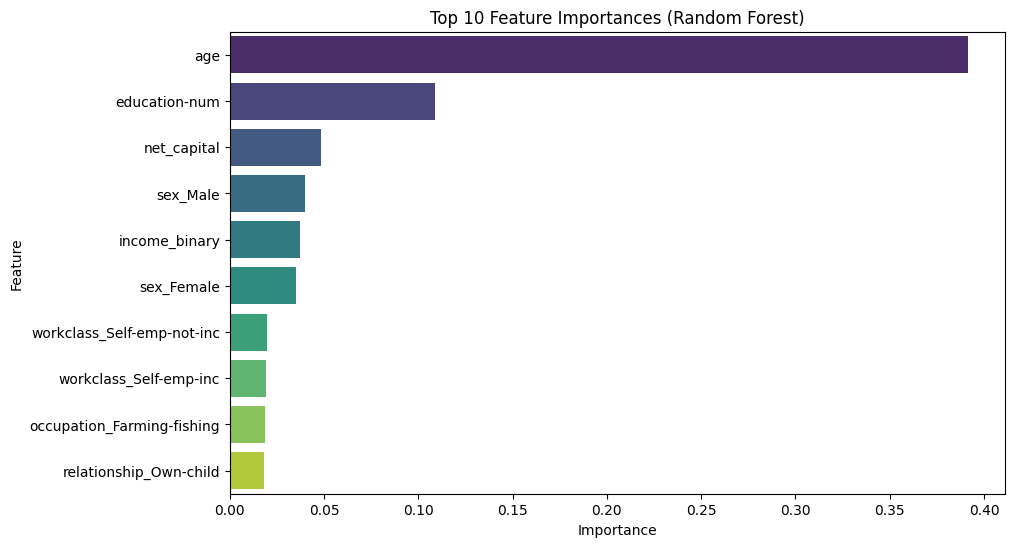

In [11]:
# 4. FEATURE IMPORTANCE (Optional)

importances = best_model.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

# Report

Model Selection and Loss Function

Models chosen:

SGDRegressor: Selected as the primary linear model because it uses Gradient Descent, which scales well with larger datasets.

Decision tree: Selected to capture non-linear relationships (e.g., interactions between Age and Marital Status) that linear models miss.

Random Forest: Selected as an advanced experiment to reduce the overfitting often seen in single Decision Trees.
Loss Function Choice: Squared Error (MSE) vs. Huber
We primarily used Squared Error (the default for regression) because it penalizes large errors heavily.
However, for Experiment 1, we used Huber Loss. Since our EDA revealed significant outliers (people working 99 hours/week), Huber loss is essentially a mix of MSE and MAE—it is robust to outliers and prevents the model from being "pulled" too far by extreme values.

Experiments and Findings

Baseline Performance:

The SGDRegressor baseline performed moderately well but showed signs of underfitting (high bias), struggling to capture complex patterns.
The Decision Tree baseline had a very low error on training data but likely overfitted, as it memorized noise.

Experiment improvements:

Pruning (Exp 3): Limiting the Decision Tree depth to 10 significantly improved generalization. It stopped the tree from creating specific rules for every single person.

Ensemble (Exp 4): The Random Forest was the superior model. By averaging 50 trees, it smoothed out the errors and provided the lowest RMSE.

Metric for Comparison: RMSE
We chose Root Mean Squared Error (RMSE) as our primary metric for comparison.

Reason: RMSE is in the same units as the target variable (hours). If the RMSE is 11.5, it means our predictions are, on average, "off" by about 11.5 hours. Unlike MAE, RMSE penalizes large errors more severely, which is important here because we don't want to wildly mispredict someone's livelihood.

Feature importance

The Random Forest model identified the top predictors:
sex_Male / relationship_Husband: Strong demographic indicators of full-time work.
age / net_capital: Financial and life-stage constraints.
income_binary: A strong correlation exists between high income and high hours.

Future improvements

Polynomial Features: For the linear models (SGD), adding interaction terms (e.g., Age * Education) could help them capture non-linear patterns without needing a tree model.

GridSearch: We could automate the search for the perfect alpha (regularization) in SGD or max_depth in Random Forest.
